In [ ]:
! git clone https://github.com/LibertyV7/DS4001G1

Cloning into 'DS4001G1'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 6), reused 4 (delta 1), pack-reused 0
Receiving objects: 100% (19/19), 315.87 KiB | 1.59 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
df = pd.read_csv('/content/DS4001G1/clean_solar_data (1).csv', encoding='latin1', low_memory = True)

In [ ]:
df.head()
df.columns.tolist()

['Unnamed: 0',
 'p_state',
 'p_county',
 'ylat',
 'xlong',
 'p_area',
 'p_tech_sec',
 'p_axis',
 'p_azimuth',
 'p_tilt',
 'p_cap_ac',
 'p_cap_dc',
 'p_type',
 'p_agrivolt',
 'p_zscore']

# Exploring State Rankings and Sunlight Power Per Year

In [ ]:
#variable of number of farms by state
state_farms = df.groupby('p_state').size().reset_index(name='no_farms')

<Figure size 1200x600 with 0 Axes>

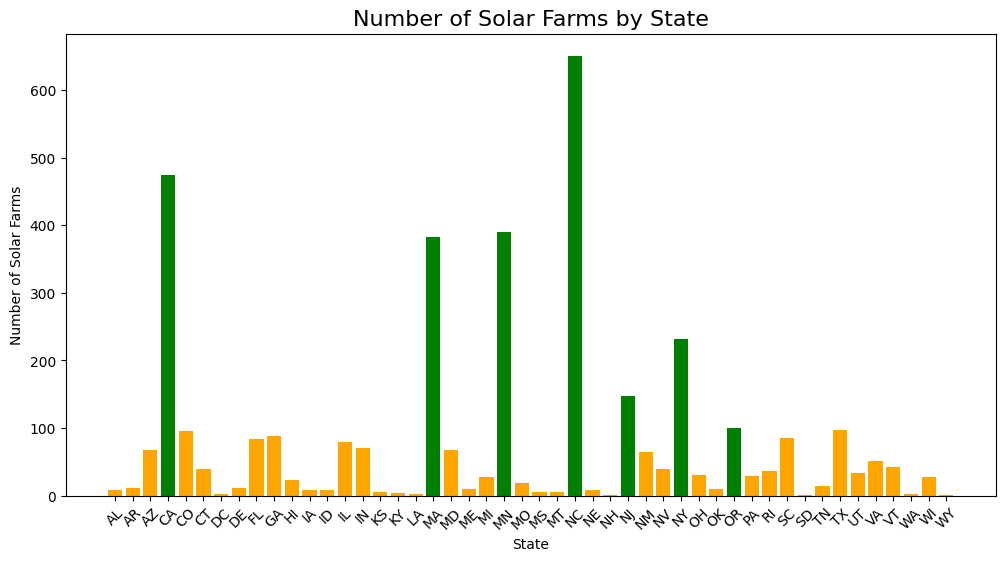

In [57]:
# create a plot of all states and their deaths
plt.figure(figsize=(12, 6))
bar_colors = ['green' if farms >= 100 else 'orange' for farms in state_farms['no_farms']]

plt.figure(figsize=(12, 6))
plt.bar(state_farms['p_state'], state_farms['no_farms'], color=bar_colors)

plt.title('Number of Solar Farms by State', fontsize=16)
plt.xlabel('State')
plt.ylabel('Number of Solar Farms')
plt.xticks(rotation=45)  # Rotate state names for readability

plt.show()

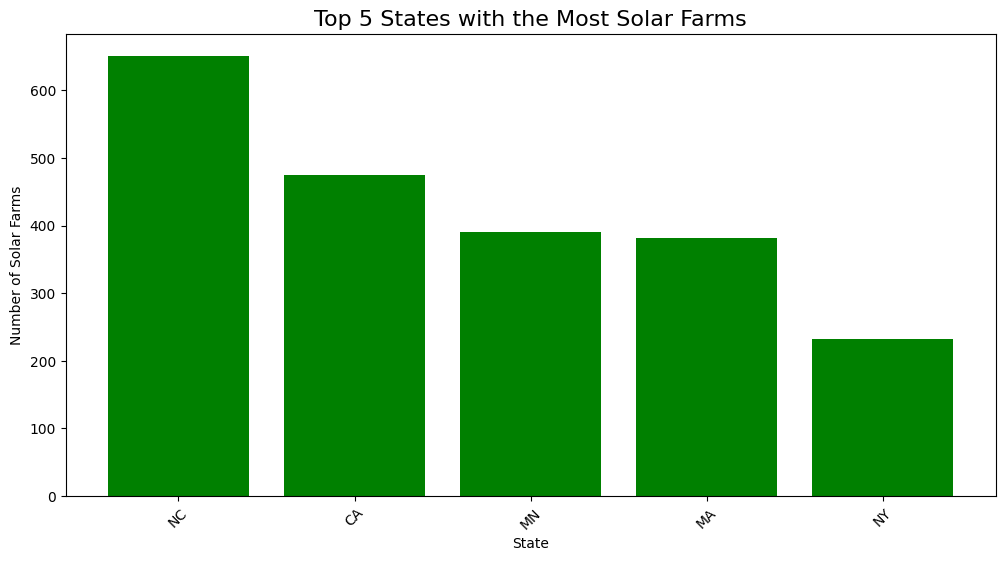

In [58]:
sorted_states = state_farms.sort_values(by='no_farms', ascending=False)

# Select the top 5 states
top_5_states = sorted_states.head(5)

# Create the plot for the top 5 states
plt.figure(figsize=(12, 6))
plt.bar(top_5_states['p_state'], top_5_states['no_farms'], color='green')

plt.title('Top 5 States with the Most Solar Farms', fontsize=16)
plt.xlabel('State')
plt.ylabel('Number of Solar Farms')
plt.xticks(rotation=45)  # Rotate state names for readability

plt.show()

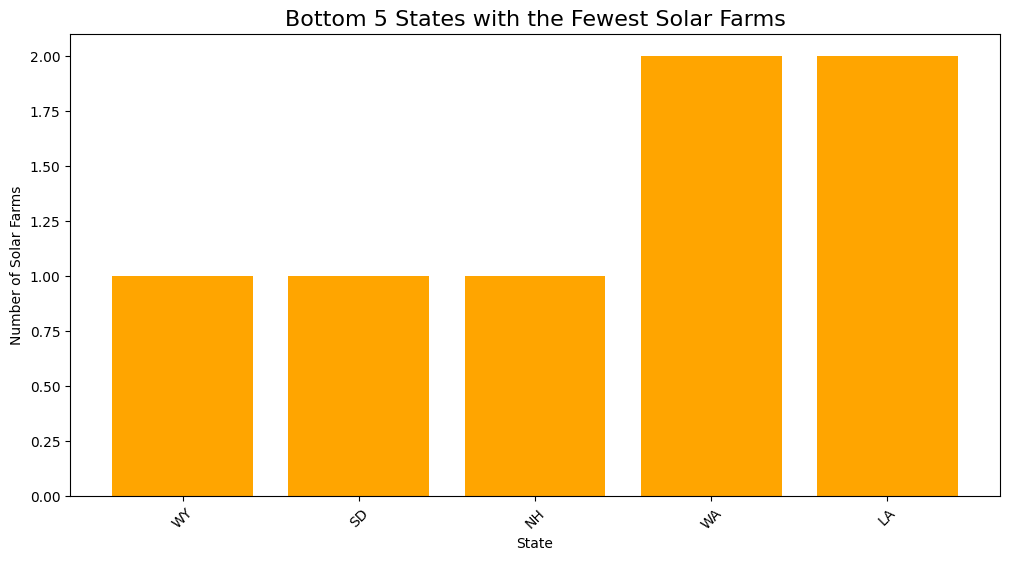

In [59]:
sorted_states = state_farms.sort_values(by='no_farms', ascending=True)
sorted_states = sorted_states[sorted_states['p_state'] != 'DC']
#this set includes DC, but that doesn't seem fair to include
#although DC did rank better than WY, SD, NH, and WA

bottom_5_states = sorted_states.head(5)

# Create the plot for the bottom 5 states
plt.figure(figsize=(12, 6))
plt.bar(bottom_5_states['p_state'], bottom_5_states['no_farms'], color='orange')  # You can customize the color if needed

plt.title('Bottom 5 States with the Fewest Solar Farms', fontsize=16)
plt.xlabel('State')
plt.ylabel('Number of Solar Farms')
plt.xticks(rotation=45)  # Rotate state names for readability

plt.show()

In [19]:
sundf = pd.read_csv('/content/avgsunlight - Sheet1.csv', encoding='latin1', low_memory = True)

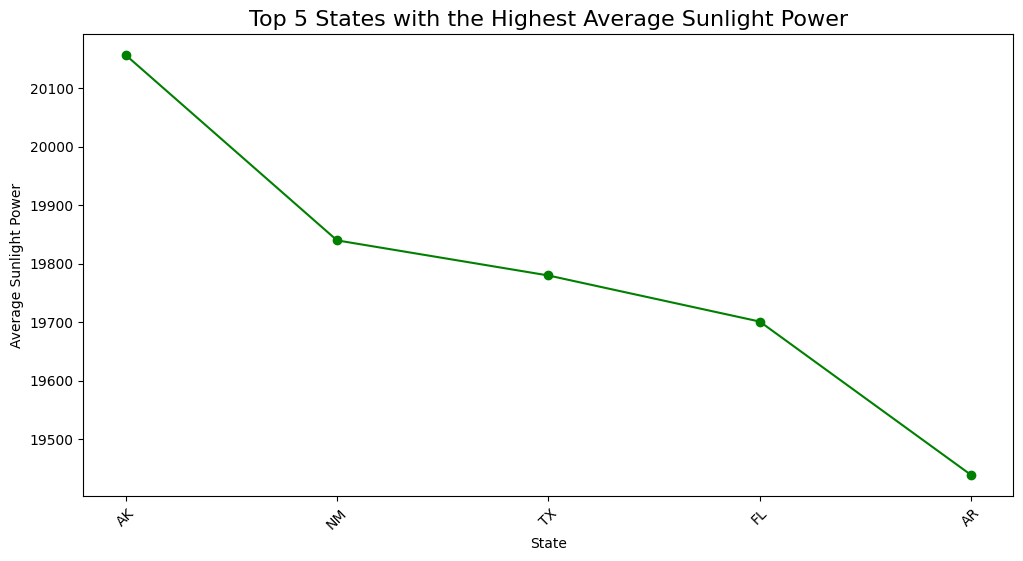

In [26]:
top5 = sundf.sort_values(by='avg_sunlight', ascending=False).head(5)
plt.figure(figsize=(12, 6))
plt.plot(top5['state'], top5['avg_sunlight'], marker='o', color='green', label='Top 5 Highest')

plt.title('Top 5 States with the Highest Average Sunlight Power', fontsize=16)
plt.xlabel('State')
plt.ylabel('Average Sunlight Power')
plt.xticks(rotation=45)  # Rotate state names for readability
plt.show()

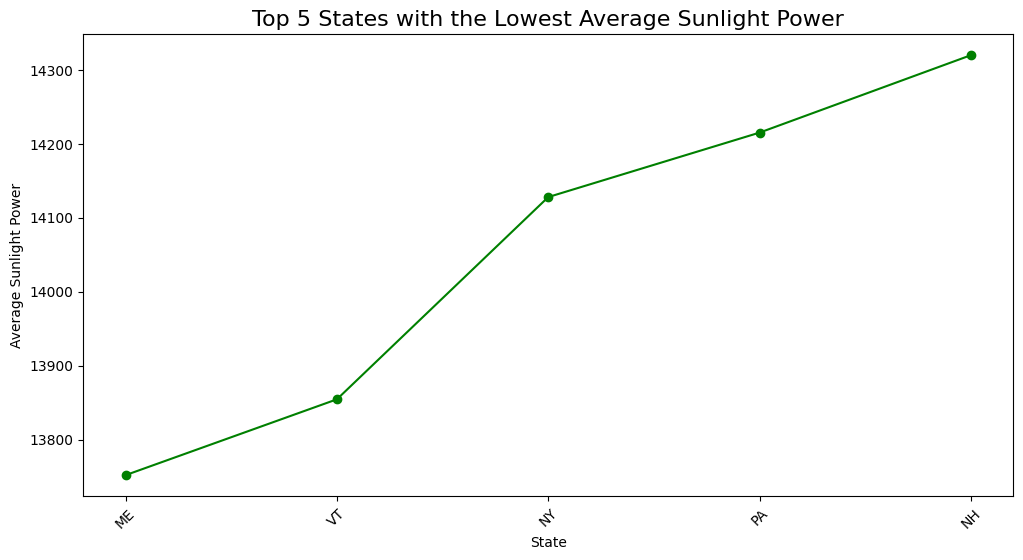

In [32]:
bot5 = sundf.sort_values(by='avg_sunlight', ascending=True).head(5)
plt.figure(figsize=(12, 6))
plt.plot(bot5['state'], bot5['avg_sunlight'], marker='o', color='green', label='Top 5 Lowest')

plt.title('Top 5 States with the Lowest Average Sunlight Power', fontsize=16)
plt.xlabel('State')
plt.ylabel('Average Sunlight Power')
plt.xticks(rotation=45)  # Rotate state names for readability
plt.show()

# Notes on Generals
- Available sunlight power does not correlate to the usage of panels
- Suggests that states' individual policy decisions could have more of an impact on the implementation of solar panels than sun availability.

# Exploring Z-Score

In [35]:
df = pd.read_csv('/content/DS4001G1/clean_solar_data (1).csv', encoding='latin1', low_memory = True)

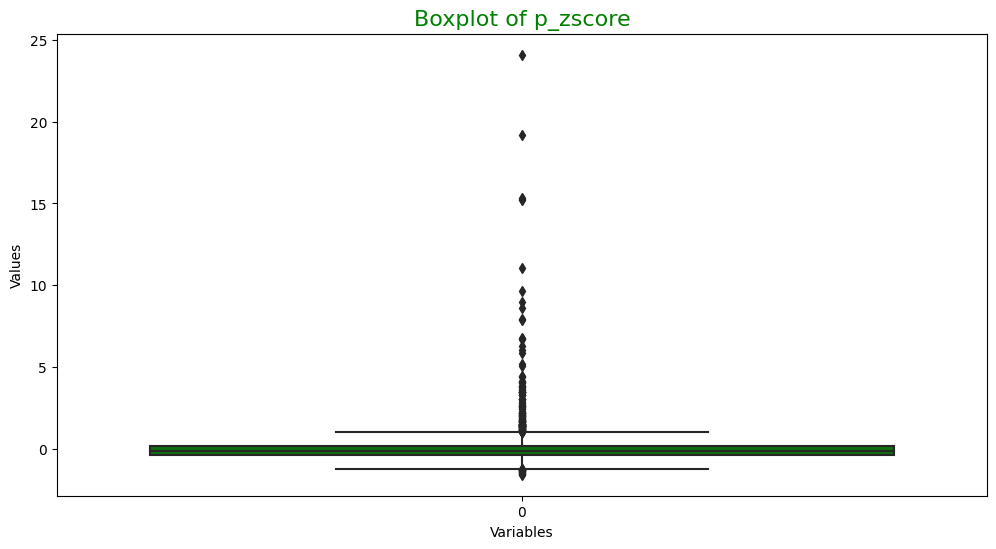

In [61]:
columns = df['p_zscore']
plt.figure(figsize=(12, 6))
sns.boxplot(data=columns, color='green')

plt.title('Boxplot of p_zscore', fontsize=16, color='green')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

# Grouped Boxplots

No.1 -- p_type

<Axes: title={'center': 'p_zscore'}, xlabel='p_axis'>

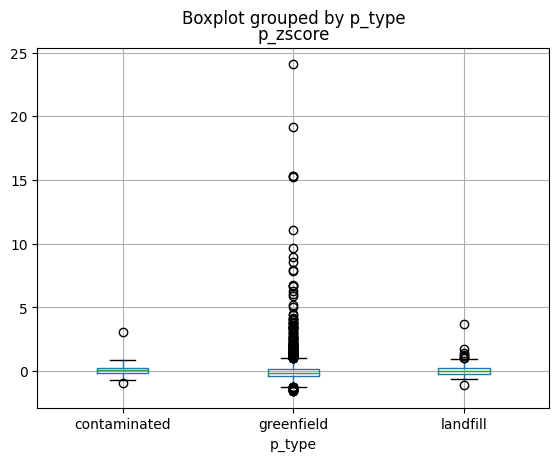

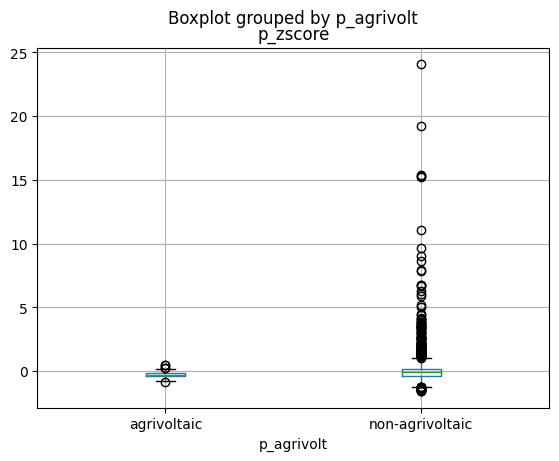

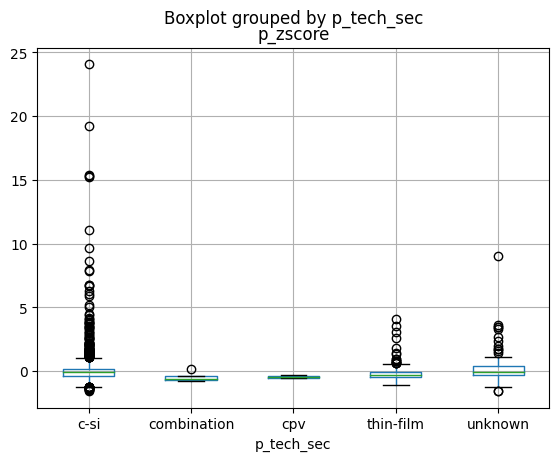

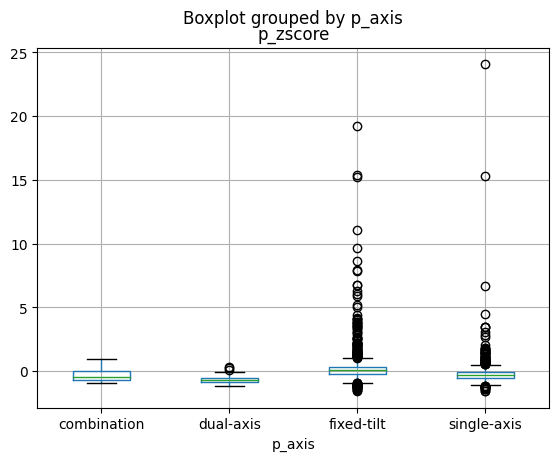

In [46]:
df.boxplot(column = 'p_zscore',by = 'p_type')
df.boxplot(column = 'p_zscore',by = 'p_agrivolt')
df.boxplot(column = 'p_zscore',by = 'p_tech_sec')
df.boxplot(column = 'p_zscore',by = 'p_axis')

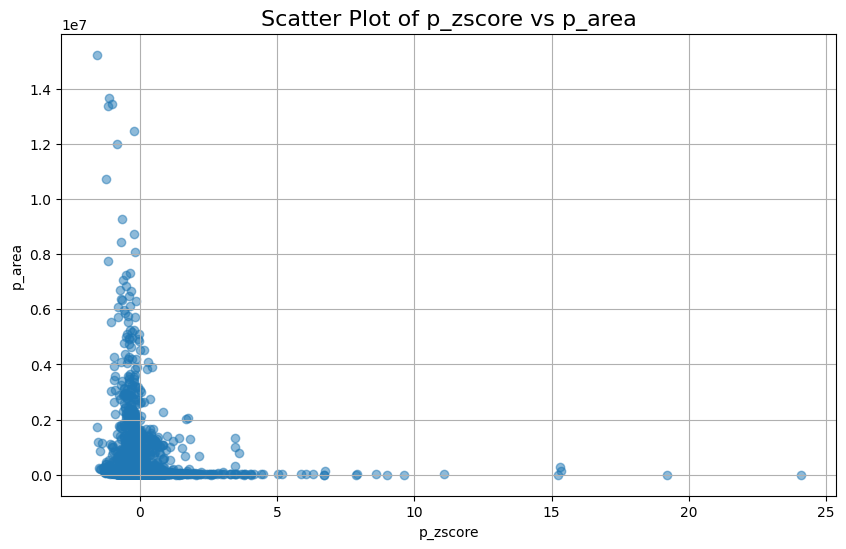

In [47]:
selected_columns = ['p_zscore', 'p_area']
selected_data = df[selected_columns]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(selected_data['p_zscore'], selected_data['p_area'], alpha=0.5)

plt.title('Scatter Plot of p_zscore vs p_area', fontsize=16)
plt.xlabel('p_zscore')
plt.ylabel('p_area')
plt.grid(True)
plt.show()

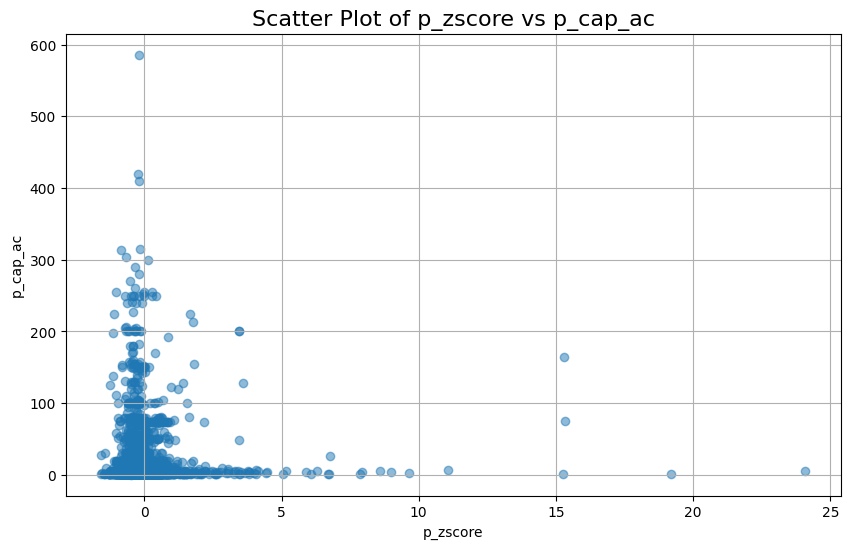

In [48]:
selected_columns = ['p_zscore', 'p_cap_ac']
selected_data = df[selected_columns]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(selected_data['p_zscore'], selected_data['p_cap_ac'], alpha=0.5)

plt.title('Scatter Plot of p_zscore vs p_cap_ac', fontsize=16)
plt.xlabel('p_zscore')
plt.ylabel('p_cap_ac')
plt.grid(True)
plt.show()

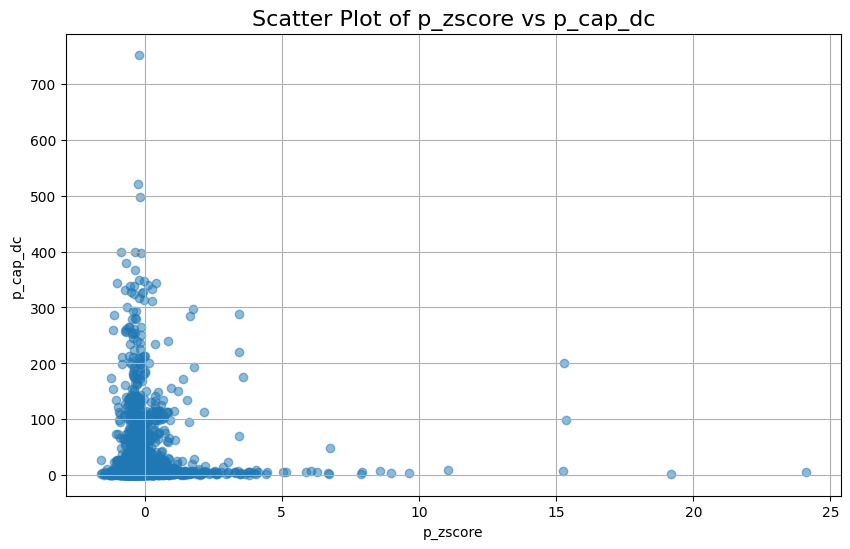

In [49]:
selected_columns = ['p_zscore', 'p_cap_dc']
selected_data = df[selected_columns]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(selected_data['p_zscore'], selected_data['p_cap_dc'], alpha=0.5)

plt.title('Scatter Plot of p_zscore vs p_cap_dc', fontsize=16)
plt.xlabel('p_zscore')
plt.ylabel('p_cap_dc')
plt.grid(True)
plt.show()

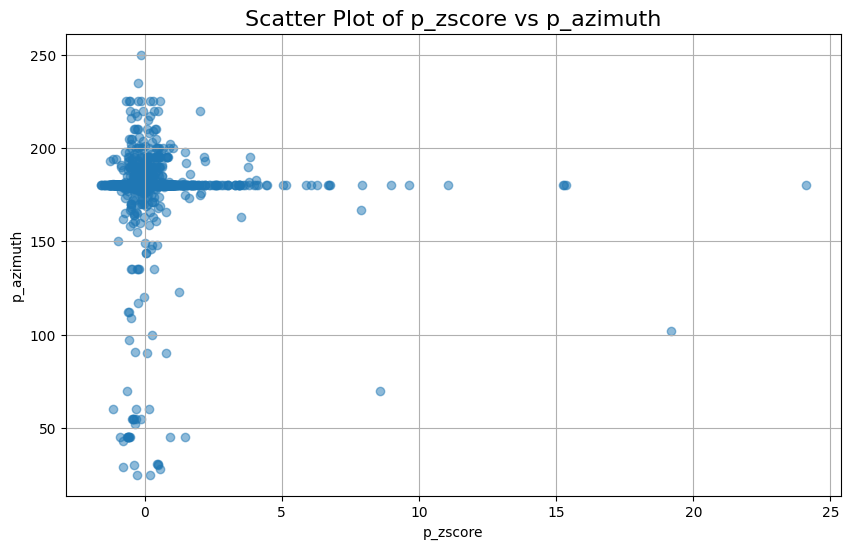

In [50]:
selected_columns = ['p_zscore', 'p_azimuth']
selected_data = df[selected_columns]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(selected_data['p_zscore'], selected_data['p_azimuth'], alpha=0.5)

plt.title('Scatter Plot of p_zscore vs p_azimuth', fontsize=16)
plt.xlabel('p_zscore')
plt.ylabel('p_azimuth')
plt.grid(True)
plt.show()